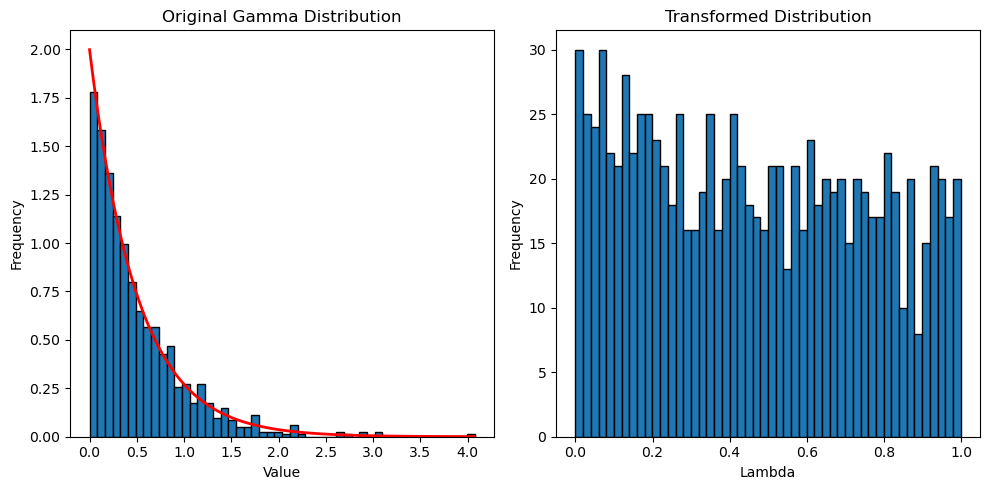

In [28]:
import numpy as np
from factory_env.envs.parameters import env_param
import matplotlib.pyplot as plt
from scipy.stats import gamma

param = env_param()

samples_transformed = []
samples_original = []

for _ in range(1000):  # adjust the range for the number of samples you want
    original_sample = np.random.gamma(param.reward_param.alpha_lambda, 1.0/param.reward_param.beta_lambda)
    samples_original.append(original_sample)
    
    Lambda = 10**(-original_sample)
    samples_transformed.append(Lambda)

    
plt.figure(figsize=(10, 5))   
plt.subplot(1, 2, 1)
plt.hist(samples_original, bins=50, edgecolor='black', density=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Original Gamma Distribution')

# Plot the PDF
x = np.linspace(min(samples_original), max(samples_original), 100)
pdf = gamma.pdf(x, param.reward_param.alpha_lambda, scale=1.0/param.reward_param.beta_lambda)
plt.plot(x, pdf, 'r-', lw=2)

plt.subplot(1, 2, 2)
plt.hist(samples_transformed, bins=50, edgecolor='black')
plt.xlabel('Lambda')
plt.ylabel('Frequency')
plt.title('Transformed Distribution')

plt.tight_layout()
plt.show()


The text suggests that the log10 of the lambda variable should be distributed according to a Gamma distribution. This sampling method ensures a certain type of skewness towards smaller values of lambda, making the agent more familiar with radical collision avoidance strategies.

The Gamma distribution is known for being quite flexible and can take on various shapes depending on its parameters. For this scenario, it's likely that the parameters of the Gamma distribution (alpha and beta) are chosen such that the distribution is skewed towards larger values. When the logarithm base 10 is applied, these larger values become negative. Thus, when 10 is raised to the power of these negative values (as per the implementation in the code), the resulting lambda values will be skewed towards 0.

This is why we sample log10(lambda) from the Gamma distribution. By doing this, we can control the distribution of lambda to be primarily small values close to 0, which would lead the agent to choose more radical collision avoidance strategies.

Just to note, in your formula, log10(lambda) is effectively distributed as -Gamma(alpha, beta), due to the negative sign before the np.random.gamma() function. This negative sign in the code effectively flips the Gamma distribution so that it's skewed towards larger values, which then become smaller values of lambda after the 10 ** operation.

该文本建议lambda变量的对数（以10为底）应该遵循伽玛分布。这种采样方法确保了对lambda较小值的偏度，使得代理更熟悉激进的碰撞避免策略。

伽玛分布以其极大的灵活性而闻名，可以根据参数的不同采取各种形状。对于这个场景，可能选择了使分布向较大值偏斜的伽玛分布参数（alpha和beta）。当应用以10为底的对数时，这些较大的值会变为负数。因此，当10的这些负值的幂（根据代码中的实现）被提升时，生成的lambda值将向0偏斜。

这就是我们为什么从伽玛分布中采样log10(lambda)。通过这样做，我们可以控制lambda的分布主要是接近0的小值，这将导致代理选择更激进的碰撞避免策略。

需要注意的是，在你的公式中，log10(lambda)实际上分布为-Gamma(alpha, beta)，这是因为在np.random.gamma()函数前的负号。这个负号在代码中有效地翻转了伽玛分布，使其偏向更大的值，这些值在10 **操作之后就变成了更小的lambda值。

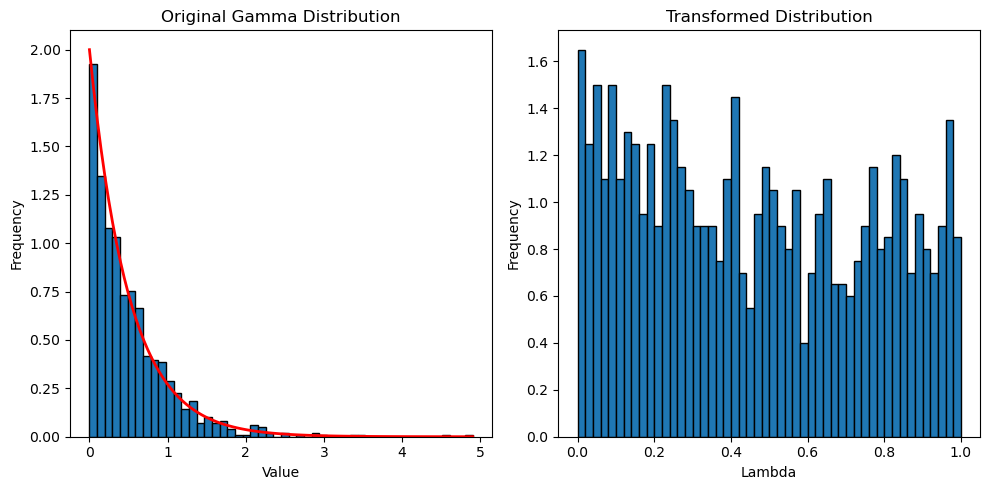

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Define your parameters
class Params:
    def __init__(self):
        class RewardParam:
            def __init__(self):
                self.alpha_lambda = 1.0
                self.beta_lambda = 2.0
        self.reward_param = RewardParam()

# Create an instance of Params
params = Params()

# Create arrays to hold the samples
samples_transformed = []
samples_original = []

# Generate samples
for _ in range(1000):  # adjust the range for the number of samples you want
    original_sample = np.random.gamma(params.reward_param.alpha_lambda, 1.0/params.reward_param.beta_lambda)
    samples_original.append(original_sample)

    transformed_sample = 10**(-original_sample)
    samples_transformed.append(transformed_sample)

# Create the histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(samples_original, bins=50, edgecolor='black', density=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Original Gamma Distribution')

# Plot the PDF
x = np.linspace(min(samples_original), max(samples_original), 100)
pdf = gamma.pdf(x, params.reward_param.alpha_lambda, scale=1.0/params.reward_param.beta_lambda)
plt.plot(x, pdf, 'r-', lw=2)

plt.subplot(1, 2, 2)
plt.hist(samples_transformed, bins=50, edgecolor='black', density=True)
plt.xlabel('Lambda')
plt.ylabel('Frequency')
plt.title('Transformed Distribution')

plt.tight_layout()
plt.show()
